# Rhys

In [60]:

import pandas as pd
import numpy as np
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
df_cleaned = df.copy().drop(['incident_id','address'], axis=1)
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned['month'] = df_cleaned.apply(lambda row: clean_month(row), axis=1)
df_cleaned['year'] = df_cleaned.apply(lambda row: clean_year(row), axis=1)
df_cleaned = df_cleaned.rename(columns={"city_or_county":"City/County","incident_date":"Incident Date","state":"State","killed":"Killed","injured":"Injured", "year":"Year","month":"Month"})
df_cleaned = df_cleaned[df_cleaned['Killed'] < 15]
df_cleaned = df_cleaned[df_cleaned['Injured'] < 20]
df_cleaned = df_cleaned[df_cleaned['Year'] < 2021]
df_cleaned['Total'] = df_cleaned['Killed'] + df_cleaned['Injured']
df_cleaned = df_cleaned[['Year','Month','State','City/County','Killed','Injured','Total']]

def clean_month(row):
    
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0]
    
def clean_year(row):
    
    years = ['2014','2015','2016','2017','2018','2019','2020','2021','2022'] 
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])

print(df_cleaned)
    



      Year     Month          State   City/County  Killed  Injured  Total
232   2020  December        Indiana  Indianapolis       1        3      4
233   2020  December         Oregon  Happy Valley       0        4      4
234   2020  December       Illinois      Rockford       3        3      6
235   2020  December        Florida         Tampa       2        2      4
236   2020  December  Massachusetts          Lynn       1        5      6
...    ...       ...            ...           ...     ...      ...    ...
2925  2014   January        Alabama    Huntsville       0        5      5
2926  2014   January    Mississippi       Jackson       0        4      4
2927  2014   January   Pennsylvania          Erie       1        3      4
2928  2014   January       New York        Queens       1        3      4
2929  2014   January       Virginia       Norfolk       2        2      4

[2689 rows x 7 columns]


In [58]:
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Killed,Injured,Total Killed and Injured
count,2689.000000,2689.000000,2689.000000,2689.000000
mean,2017.421346,0.995165,3.976199,4.971365
std,2.036279,1.429251,1.958315,1.872697
min,2014.000000,0.000000,0.000000,4.000000
25%,2016.000000,0.000000,3.000000,4.000000
50%,2018.000000,1.000000,4.000000,4.000000
75%,2019.000000,1.000000,5.000000,5.000000
max,2020.000000,13.000000,19.000000,27.000000


In [13]:
df_cleaned.nunique(axis=0)

Incident Date    1567
State              48
City/County       858
Killed             13
Injured            20
dtype: int64

#### Above is a standard, mean, max and min of our dataset after it was filtered to remove injured and killed outliers.
#### As you can see only about only about 1 person is killed and 4 injured per incident.

### Below is a scatter plot of how many were per incident each state

<AxesSubplot:title={'center':'Number killed in each State'}, xlabel='State', ylabel='Killed'>

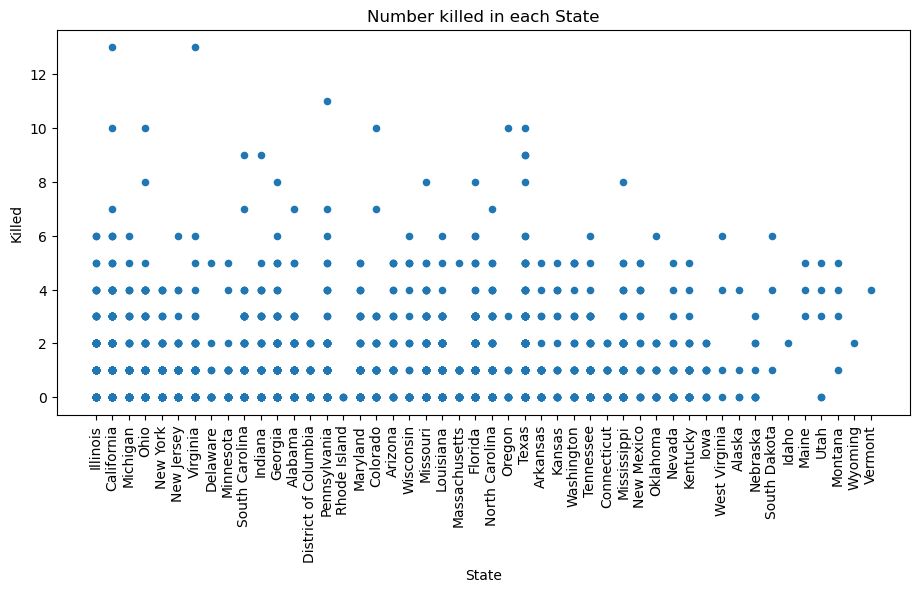

In [38]:
df_cleaned.plot(kind = 'scatter',figsize=(11,5), x = 'State', y = 'Killed', rot = 90, title = "Number killed in each State")

### Below is a scatter plot of the number of people injured per incident seperated by state.

<AxesSubplot:title={'center':'Number injured in each state'}, xlabel='State', ylabel='Injured'>

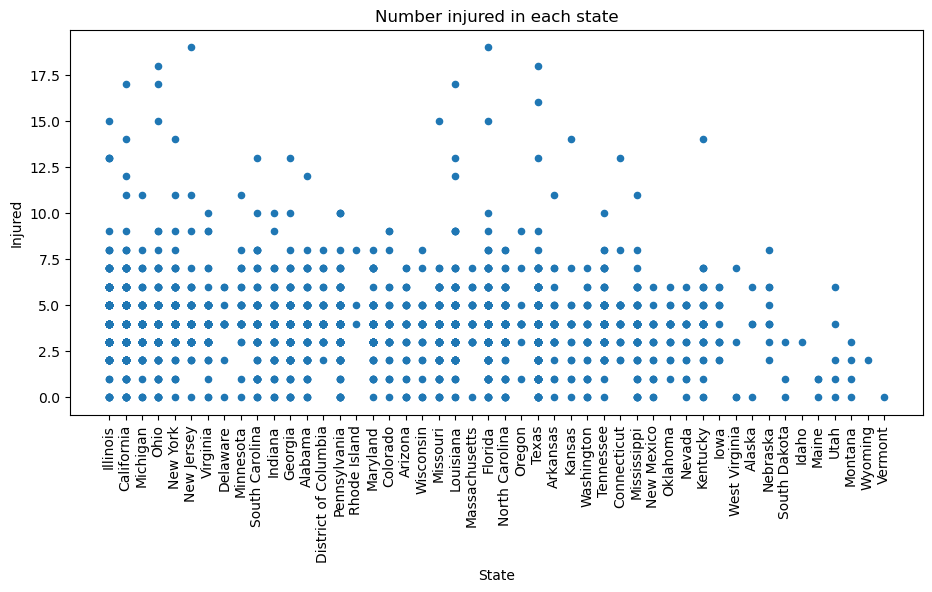

In [42]:
df_cleaned.plot(kind = 'scatter',figsize=(11,5), x = 'State', y = 'Injured', rot = 90, title = 'Number injured in each state')

### The graph below shows the frequency of about how many people were killed per incident analzyed.

<AxesSubplot:title={'center':'Frequency of killed per incident'}, ylabel='Frequency'>

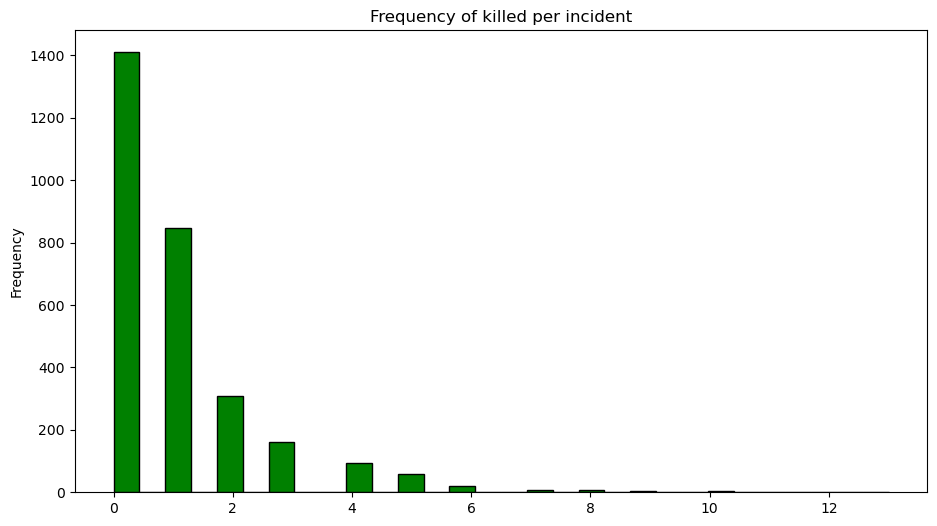

In [33]:
df_cleaned['Killed'].plot(kind='hist', bins=30, figsize=(11,6), facecolor='green',edgecolor='black',title = "Frequency of killed per incident")

In [2]:
from .. import project_functions1
df = project_functions.load_and_process("../data/raw/US_Gun_Violence_Data.csv")



ImportError: attempted relative import with no known parent package

## Research question/interests

I wonder what is required for it to be considered a mass shooting? Because for most of our shooting incidents on average, only 1 person was killed and about 4 were injured. Quite alot less than the shootings you hear about in the media. 
I find it quite interesting how often a shooting occurs in the US. Looking through the dates of the shootings from our data, we can see that a shooting occurs quite frequently with approximatley one happening every day.
I also find it quite interesting that the frequency of shootings has also gone up since 2014, or when our data began. This is quite concerning as an increase in shootings leads to more death and more injuries across the US.